# CASE STUDY: Recipe Website
# Gabriel Iyanuoluwa Aboyeji

# STEP #1: PROBLEM STATEMENT

# DataCamp Certification Case Study

### Project Brief

A food website has hired you as a data scientist. The website features new recipes on the homepage every day. They want to feature recipes that will be popular with visitors to the site. However, it is difficult to guess in advance which recipes will be popular or not.

They have collected data from previously published recipes. The owner wants to know whether you can use this information to predict whether a recipe will be popular (or in other words, receive a high score). She is especially interested in preventing unpopular (low-scoring) recipes from appearing on the homepage. She estimates that of all unpopular recipes, they currently correctly categorize 75% of them as being unpopular. She wants to know how your solution would compare to this guessing approach.

You will need to present your findings to the owner, who has no technical data science background.

The data you will use for this analysis can be accessed here: `"data/recipes.csv"`

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
# Load libraries
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# STEP #2: IMPORTING AND CLEANING DATA

In [2]:
# Load data from the csv file
recipe_rating = pd.read_csv('data/recipes.csv')
print(f"Number of rows/records: {recipe_rating.shape[0]}")
print(f"Number of columns/variables: {recipe_rating.shape[1]}")
recipe_rating.head()

Number of rows/records: 43092
Number of columns/variables: 10


,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,46085,Crock Pot Baked Potato Soup,One Dish Meal,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,93832,Frittata Di Spaghetti (spaghetti Frittata),Breakfast,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,36034,Berries With Italian Cream,Dessert,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,329988,Pork Tenderloin Medallions With Fresh Figs,< 15 Mins,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,59886,Kaseropita (Tiropita Using Kaseri Cheese),Savory Pies,261.6,103.6,20.9,0.2,6.7,15.0,1.0


#### Understand your variables

In [3]:

variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(recipe_rating.columns):
    variables.loc[i] = [var, recipe_rating[var].nunique(), recipe_rating[var].unique().tolist()]
variables

,Variable,Number of unique values,Values
0,RecipeId,43092,"[46085, 93832, 36034, 329988, 59886, 328806, 3..."
1,Name,41240,"[Crock Pot Baked Potato Soup, Frittata Di Spag..."
2,RecipeCategory,246,"[One Dish Meal, Breakfast, Dessert, < 15 Mins,..."
3,Calories,9420,"[699.8, 297.1, 131.9, 203.0, 261.6, 313.4, 566..."
4,CholesterolContent,3644,"[137.3, 191.8, 23.3, 74.8, 103.6, 42.7, 103.7,..."
5,CarbohydrateContent,1690,"[46.1, 11.7, 10.3, 1.5, 20.9, 42.1, 10.1, 15.1..."
6,SugarContent,1119,"[1.4, 0.7, 4.4, 0.6, 0.2, 17.0, 5.0, 6.4, 0.3,..."
7,ProteinContent,1034,"[20.9, 12.2, 9.1, 23.3, 6.7, 11.7, 25.6, 5.1, ..."
8,RecipeServings,82,"[6.0, 8.0, 4.0, 15.0, 2.0, 1.0, 10.0, 20.0, 12..."
9,HighScore,2,"[1.0, 0.0]"


In [4]:
# shape and contents
print(recipe_rating.shape)
print(recipe_rating.dtypes)


(43092, 10)
RecipeId                 int64
Name                    object
RecipeCategory          object
Calories               float64
CholesterolContent     float64
CarbohydrateContent    float64
SugarContent           float64
ProteinContent         float64
RecipeServings         float64
HighScore              float64
dtype: object


In [5]:
# descriptions
pd.set_option('precision', 1)
print(recipe_rating.describe())

       RecipeId  Calories  CholesterolContent  CarbohydrateContent  \
count   43092.0   43092.0             43092.0              43092.0   
mean   224707.9     353.3                69.5                 32.8   
std    141980.9     405.1               112.4                 46.4   
min        38.0       0.0                 0.0                  0.0   
25%    102616.8     164.8                 4.5                 11.6   
50%    212333.0     284.1                40.7                 25.4   
75%    336736.2     446.7                95.9                 43.4   
max    540876.0   30933.4              9167.2               3564.4   

       SugarContent  ProteinContent  RecipeServings  HighScore  
count       43092.0         43092.0         43092.0    43092.0  
mean           12.2            15.8             9.5        0.6  
std            28.3            21.6           224.0        0.5  
min             0.0             0.0             1.0        0.0  
25%             2.2             3.4         

In [6]:
#Identify and calculate the percentage of the missing values in each attribute
recipe_rating.isnull().sum()

RecipeId                0
Name                    0
RecipeCategory         40
Calories                0
CholesterolContent      0
CarbohydrateContent     0
SugarContent            0
ProteinContent          0
RecipeServings          0
HighScore               0
dtype: int64

HighScore
0.0    15266
1.0    27826
dtype: int64


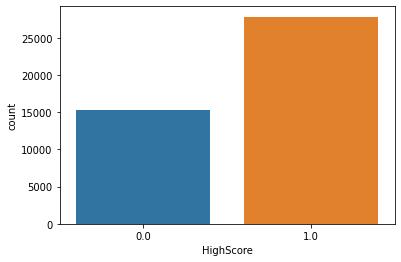

In [7]:
sns.countplot(recipe_rating['HighScore'], label = "Count") 
print(recipe_rating.groupby('HighScore').size())

In [8]:
print(recipe_rating['RecipeCategory'].value_counts())

Dessert          4211
Lunch/Snacks     3271
One Dish Meal    2895
Vegetable        2497
Breakfast        1969
                 ... 
Octopus             1
No Shell Fish       1
Sudanese            1
Welsh               1
Cantonese           1
Name: RecipeCategory, Length: 246, dtype: int64


From Explaratory Data Analysis we can see there is a huge gap in terms of values within the Numerical columns. The mean values are far from the max values in columns 'Calories', 'CholesterolContent', 'CarbohydrateContent', 'SugarContent', 'ProteinContent', 'RecipeServings' . We will need to fix that.
We also see that there are 40 missing values all from RecipeCategory, since this is very small compared to total data we will leave as is.
When we count ratings based on RecipeCategory, we see there are lots of small samples/Category, we can clean some of that up as well.
Balance between Popular and Unpopular look good for use of this dataset.
We will go ahead and do some data cleaning to remove some of the noise and outliers. 

In [9]:
#seperate for easier referencing
NUMERIC = ['Calories', 'CholesterolContent', 'CarbohydrateContent', 'SugarContent', 'ProteinContent', 'RecipeServings']
CATEGORICAL = ["RecipeCategory"]
RECIPE = ["Name"]
RECIPEID = ["RecipeId"]

TARGET = ["HighScore"]

In [10]:
recipe_rating[NUMERIC].agg(['min','max','mean']).round(2)

,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings
min,0.0,0.0,0.0,0.0,0.0,1.0
max,30933.4,9167.2,3564.4,2566.8,1420.8,32767.0
mean,353.3,69.5,32.8,12.2,15.8,9.5


To Clean up Outliers we standardize the dataset and remove any outliers from standardizing. this removes about a thousand entries

In [11]:
recipe_rating_clean = recipe_rating[(np.abs(stats.zscore(recipe_rating[NUMERIC])) < 3).all(axis = 1)]
recipe_rating_clean.reset_index(drop=True,inplace=True)
print(recipe_rating_clean.shape)

(42006, 10)


In [12]:
#look at updated dataset
print(recipe_rating_clean.describe())

       RecipeId  Calories  CholesterolContent  CarbohydrateContent  \
count   42006.0   42006.0             42006.0              42006.0   
mean   224668.6     323.2                61.6                 30.3   
std    141779.8     222.0                70.4                 24.5   
min        38.0       0.0                 0.0                  0.0   
25%    102694.0     161.9                 4.2                 11.5   
50%    212251.5     278.5                39.1                 25.1   
75%    336379.2     433.9                92.8                 42.6   
max    540876.0    1562.7               406.7                171.9   

       SugarContent  ProteinContent  RecipeServings  HighScore  
count       42006.0         42006.0         42006.0    42006.0  
mean           10.8            14.6             8.0        0.6  
std            13.6            14.8             9.9        0.5  
min             0.0             0.0             1.0        0.0  
25%             2.2             3.3         

In [13]:
recipe_rating_clean[NUMERIC].agg(['min','max','mean']).round(2)

,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings
min,0.0,0.0,0.0,0.0,0.0,1.0
max,1562.7,406.7,171.9,97.1,80.5,610.0
mean,323.2,61.6,30.3,10.8,14.6,8.0


Looks much better

In [14]:
#no change in null
recipe_rating_clean.isnull().sum()

RecipeId                0
Name                    0
RecipeCategory         40
Calories                0
CholesterolContent      0
CarbohydrateContent     0
SugarContent            0
ProteinContent          0
RecipeServings          0
HighScore               0
dtype: int64

HighScore
0.0    14915
1.0    27091
dtype: int64


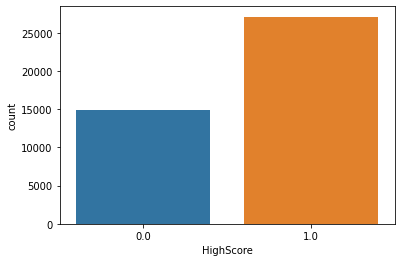

In [15]:
sns.countplot(recipe_rating_clean['HighScore'], label = "Count") 
print(recipe_rating_clean.groupby('HighScore').size())

Now we look at count of popular vs unpopular by RecipeCategory

In [16]:
recipe_rating_clean.groupby(['RecipeCategory','HighScore']).HighScore.count().sort_values(ascending=False)

RecipeCategory  HighScore
Dessert         1.0          2674
Lunch/Snacks    1.0          2103
Vegetable       1.0          1625
One Dish Meal   1.0          1615
Dessert         0.0          1435
                             ... 
Ice Cream       0.0             1
Iraqi           0.0             1
                1.0             1
Korean          0.0             1
Spring          0.0             1
Name: HighScore, Length: 454, dtype: int64

We see there is an imbalance by category and we may not need as many categories or we can summarize the categories into less buckets but for the purpose of this project we will remove all Categories with total entries less than 100. 

In [17]:
counts  = recipe_rating_clean['RecipeCategory'].value_counts()
recipe_rating_clean1 = recipe_rating_clean.loc[recipe_rating_clean['RecipeCategory'].isin(counts.index[counts >= 100])]
recipe_rating_clean1.reset_index(drop=True,inplace=True)

In [18]:
recipe_rating_clean1.head()

,RecipeId,Name,RecipeCategory,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings,HighScore
0,46085,Crock Pot Baked Potato Soup,One Dish Meal,699.8,137.3,46.1,1.4,20.9,6.0,1.0
1,93832,Frittata Di Spaghetti (spaghetti Frittata),Breakfast,297.1,191.8,11.7,0.7,12.2,8.0,1.0
2,36034,Berries With Italian Cream,Dessert,131.9,23.3,10.3,4.4,9.1,6.0,0.0
3,329988,Pork Tenderloin Medallions With Fresh Figs,< 15 Mins,203.0,74.8,1.5,0.6,23.3,4.0,1.0
4,59886,Kaseropita (Tiropita Using Kaseri Cheese),Savory Pies,261.6,103.6,20.9,0.2,6.7,15.0,1.0


In [19]:
recipe_rating_clean1[NUMERIC].agg(['min','max','mean']).round(2)

,Calories,CholesterolContent,CarbohydrateContent,SugarContent,ProteinContent,RecipeServings
min,0.0,0.0,0.0,0.0,0.0,1.0
max,1562.7,406.7,171.9,97.1,80.5,610.0
mean,323.1,61.0,30.5,11.0,14.4,8.1


In [20]:
print(recipe_rating_clean1.shape)

(38757, 10)


# STEP #3: VISUALIZING THE DATA

##### we look at relationship between columns

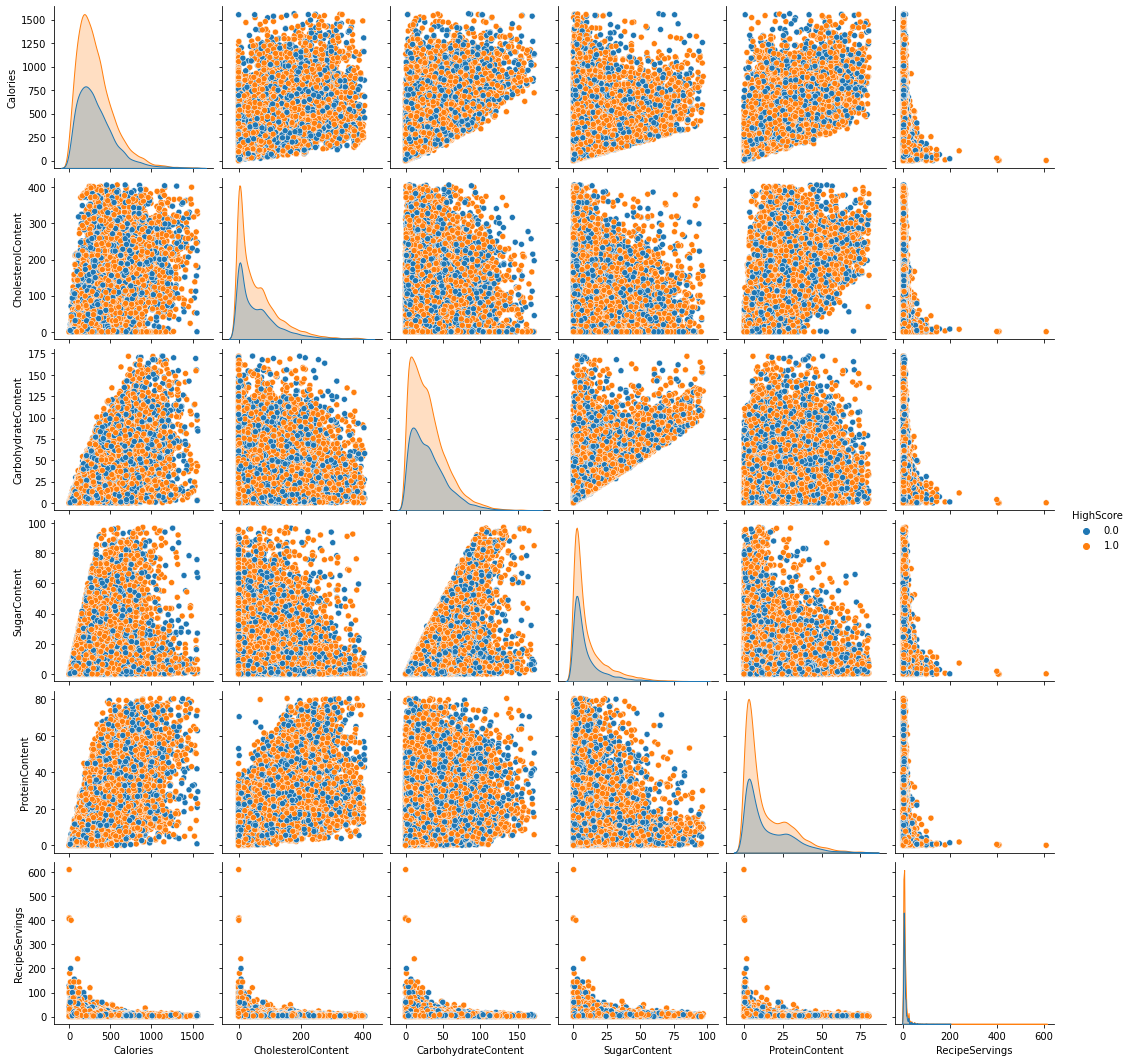

In [21]:
sns.pairplot(recipe_rating_clean1, hue = 'HighScore', vars = NUMERIC )

#### We look at correllation between Target Variable and Columns

<AxesSubplot:title={'center':'Correlation with High Score'}>

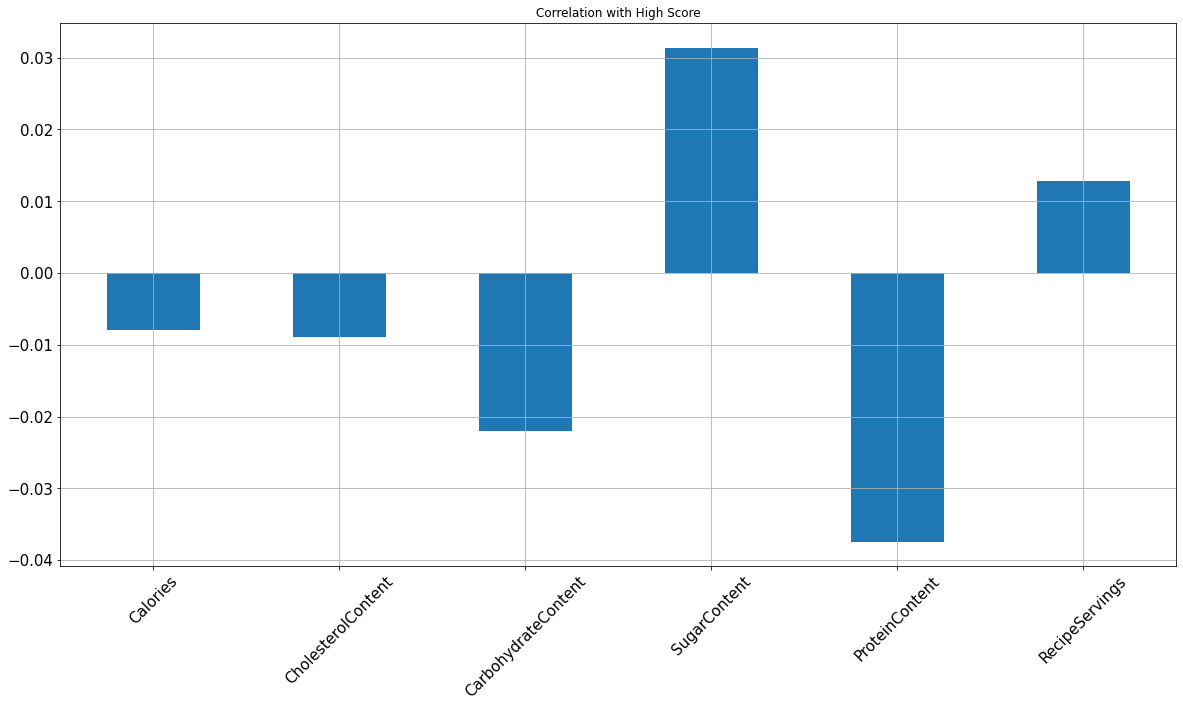

In [22]:
recipe_rating_clean1[NUMERIC].corrwith(recipe_rating_clean1.HighScore).plot.bar(
        figsize = (20, 10), title = "Correlation with High Score", fontsize = 15,
        rot = 45, grid = True)

##### We look at correlation Matrix

<AxesSubplot:>

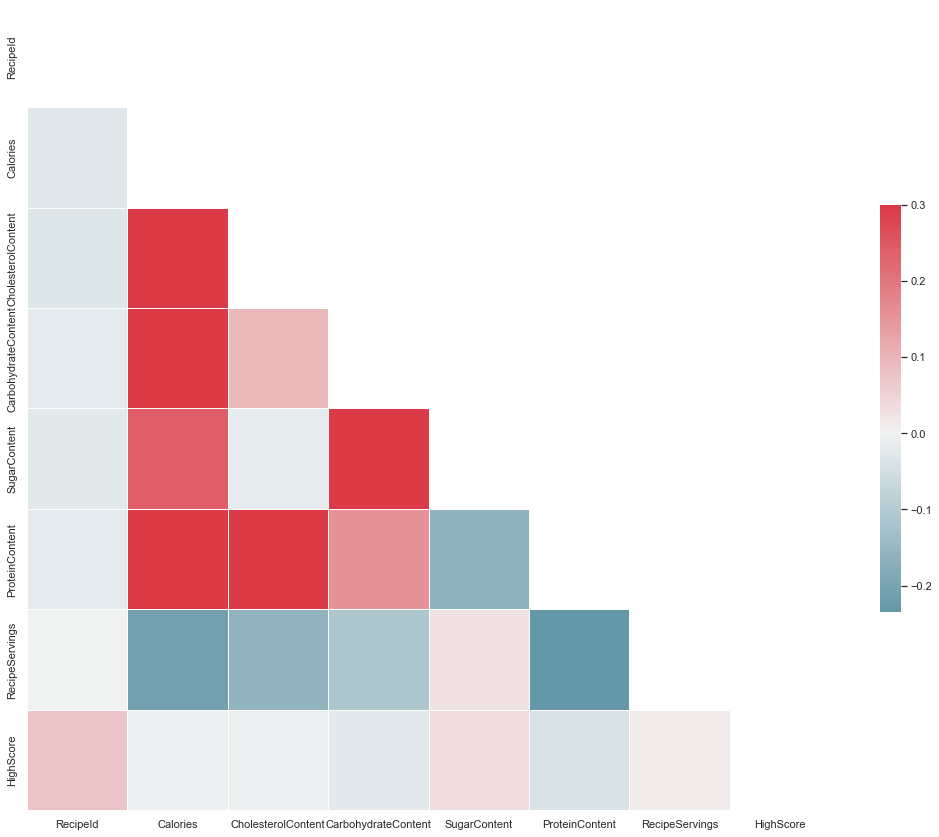

In [23]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = recipe_rating_clean1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


<AxesSubplot:>

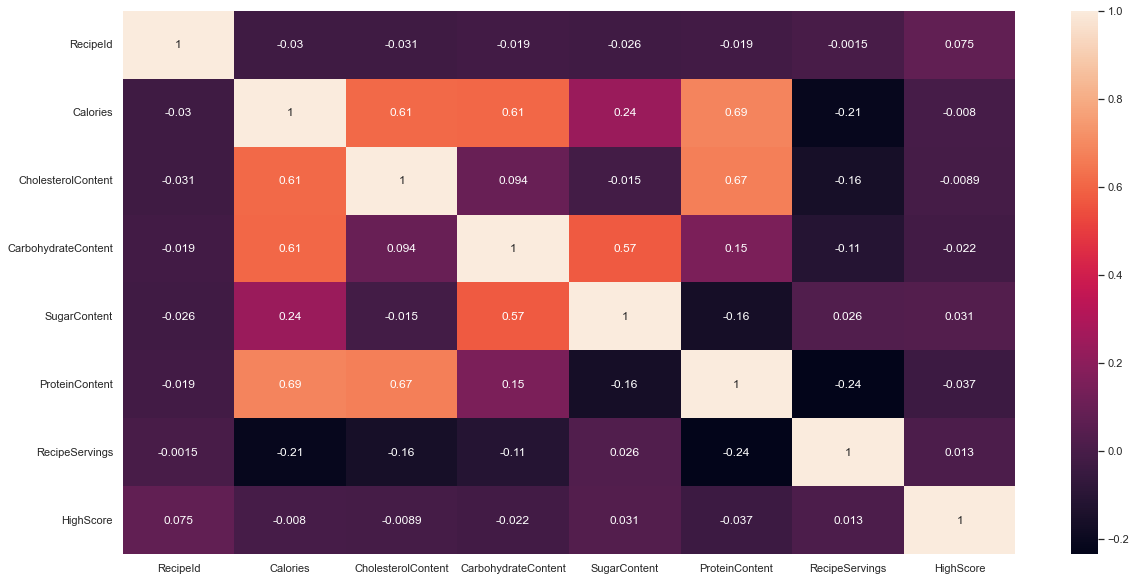

In [24]:
plt.figure(figsize=(20,10)) 
sns.heatmap(recipe_rating_clean1.corr(), annot=True) 

##### From the above plots we can see that correllation with popularity is highest in  'CarbohydrateContent', 'SugarContent', 'ProteinContent'.
#### We can also see from the correlation matrix that Calories has a high correllation with most of the other columns so we made need to drop it when we get to modelling as it may insert a lot of bias in out data.
#### This makes sense as calories should be strongly correlated with increase in amount of content in food.
#### RecipeServings may also need to be dropped we see a strong negative correlation

# STEP #4: MODEL TRAINING (FINDING A PROBLEM SOLUTION)

##### First we try to find the best features to use in our model

In [25]:
array = recipe_rating_clean1[NUMERIC].values
target = recipe_rating_clean1[TARGET ].values
X = array[:,0:6]
Y = target
# feature extraction
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, Y)
print(model.feature_importances_)


[0.19034036 0.15910946 0.18505782 0.17655045 0.17582101 0.11312089]


In [26]:
# Feature Selection with RFE
array = recipe_rating_clean1[NUMERIC].values
target = recipe_rating_clean1[TARGET ].values
X = array[:,0:6]
Y = target
# feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False False  True  True  True False]
Feature Ranking: [2 4 1 1 1 3]


##### We can see from the feature selection that  'CarbohydrateContent', 'SugarContent', 'ProteinContent' seem to be the most import columns as predicted and we will use the 3 columns going forward for our modelling

In [63]:
# Let's drop the not needed label coloumns for training
array_X = recipe_rating_clean1[['CarbohydrateContent','SugarContent','ProteinContent']].values
array_Y = recipe_rating_clean1[TARGET].values
X = array_X.astype(float)
y = array_Y
validation_size = 0.3
seed = 45


In [64]:
#Split into Training and Validation/Test Set
X_train, X_validation, y_train, y_validation = train_test_split(X, y,
test_size=validation_size, random_state=seed)

In [65]:
# Test options and evaluation metric
num_folds = 10
scoring = 'accuracy'

In [66]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [67]:
# Standardize the dataset and apply models
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM',
SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.643813 (0.008620)
ScaledLDA: 0.643813 (0.008550)
ScaledKNN: 0.575252 (0.007891)
ScaledCART: 0.543919 (0.010763)
ScaledNB: 0.641454 (0.010299)
ScaledSVM: 0.643997 (0.008628)


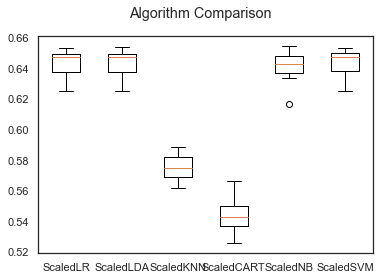

In [68]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Based on Probailities SVM looks like the go to Algorithm for predictions, next we Tune our Model to get the best parameters

In [69]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [70]:
y_predict = svc_model.predict(X_validation)
cm = confusion_matrix(y_validation, y_predict)

<AxesSubplot:>

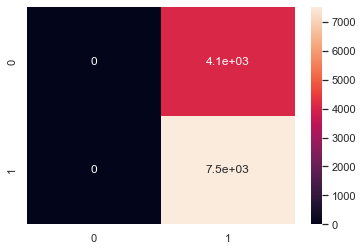

In [71]:
sns.heatmap(cm, annot=True)

In [73]:
print(classification_report(y_validation, y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      4110
         1.0       0.65      1.00      0.79      7518

    accuracy                           0.65     11628
   macro avg       0.32      0.50      0.39     11628
weighted avg       0.42      0.65      0.51     11628



# Conclusion
We were able to in a few hours achieve a mean accuracy of 65% to predict popular Recipes, while this is not up to the 75% accuracy for unpopular currently done, there is confidence that there is a lot of room for improvement, given more time to tune our model so our machine can learn about our data more and make better predictions. We have confidence in our model because of the F1 score of 0.65 for the model in general and 0.79 to predict popular recipes.
We can start off with this model to make sure we are keeping the popular recipes and showing them on the landing webpage and continue Fine Tuning our model until we get a more acceptable result.



# Future Work

<li> Look into our RecipeCategory column and figure out how we can input that in our model by encoding, given that it has over 200 categories, we need to find an efficient way to encode to produce desired result
  <li>  Do more Huperparameter Tuning and ensemeble and create a confusion matrix to see how our predictions are doing
  <li>  Look into using more Classifier Algorithm that may not have been included in our current Models.
   <li> Might be a good idea to look at more equally weighted data for popular and unpopular for better
       predictions   
    
